<a href="https://colab.research.google.com/github/Asifbinsyed/Pytorch/blob/main/ANN_pytorch(CampusX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- flow of the work
  - dataloader
  - training loop
  - evaluation loop
  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, dataloader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# set the manual seed
torch.manual_seed(42)

In [4]:
df = pd.read_csv("fmnist_small.csv")

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120,108,0,0,4,6,11,...,243,255,255,251,242,236,230,246,228,0,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,202,213,210,205,204,221,157,172,131,55,...,0,77,157,148,155,146,151,149,152,154,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,136,31,136,42,0,3,0,...,138,152,160,152,162,144,208,181,1,18,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,29,132,0,0,101,10,0,2,0,0,...,155,178,149,163,165,138,147,170,149,134,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


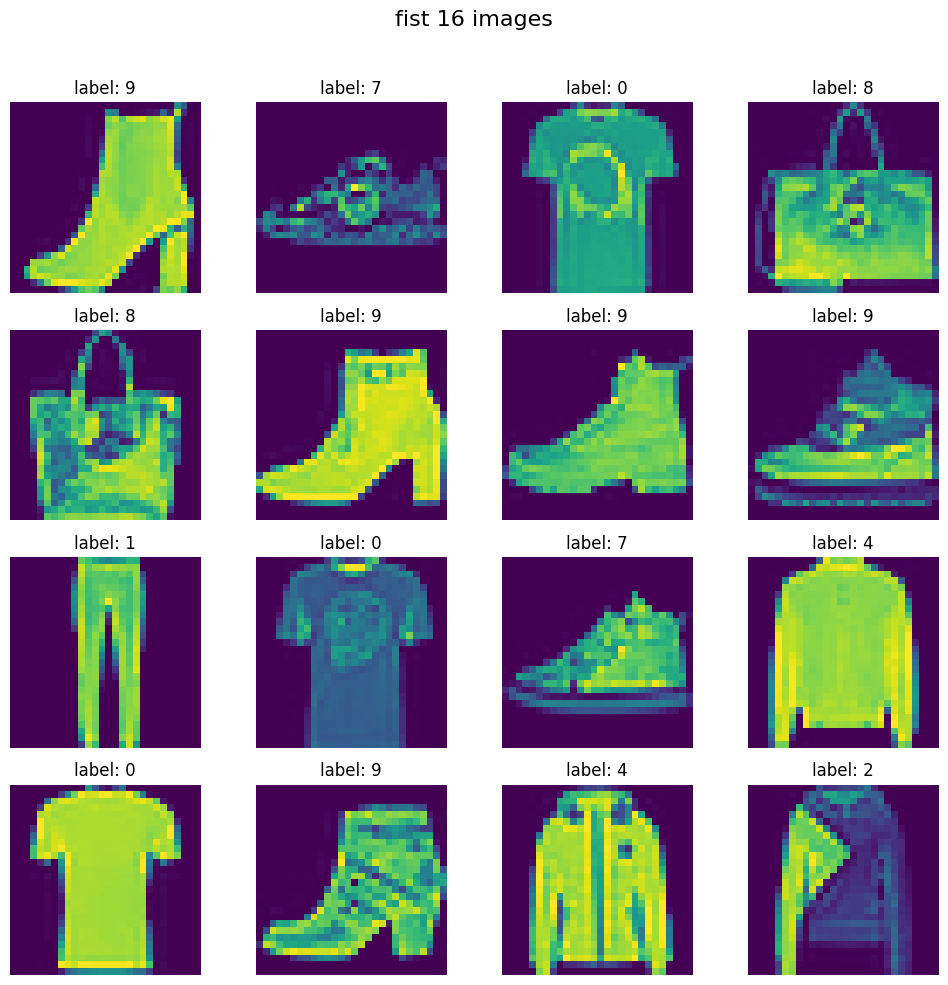

In [13]:
# create the grid of the images
fig, axes = plt.subplots(4,4, figsize =(10, 10))
fig.suptitle("first 16 images", fontsize = 16 )

# plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"label: {df.iloc[i,0]}")
plt.tight_layout(rect= [0,0,1,0.96])
plt.show()


In [14]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
x_train = X_train/255
x_test = X_test/255
print(x_train.shape)
print(x_test.shape)

(4800, 784)
(1200, 784)


In [19]:
# Create the custom dataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]


In [20]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [25]:
train_dataloader = dataloader.DataLoader(train_dataset, batch_size= 32, shuffle = True)
test_dataloader = dataloader.DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [41]:
# define a nn class

class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128,10),
        nn.ReLU()
    )

  def forward(self, x):
    return (self.model(x))



In [42]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1


In [43]:
# instantiate the model
model = MyNN(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)


In [44]:
#let's create the training loop
for epoch in range(epochs):
  for batch_features, batch_labels in train_dataloader:
    total_epoch_loss = 0
    # forward pass
    outputs = model(batch_features)

    # calculate the loss
    loss = criterion(outputs, batch_labels)

    # optimizer
    optimizer.zero_grad()
    loss.backward()

    # optimizer step
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss / len(batch_labels)
  print(f" Epoch: {epoch + 1 } | loss: {avg_loss}")


 Epoch: 1 | loss: 0.035298898816108704
 Epoch: 2 | loss: 0.02221028134226799
 Epoch: 3 | loss: 0.023004967719316483
 Epoch: 4 | loss: 0.028852296993136406
 Epoch: 5 | loss: 0.04033522307872772
 Epoch: 6 | loss: 0.017124252393841743
 Epoch: 7 | loss: 0.02388114295899868
 Epoch: 8 | loss: 0.019976483657956123
 Epoch: 9 | loss: 0.01867143251001835
 Epoch: 10 | loss: 0.023556489497423172
 Epoch: 11 | loss: 0.02186269313097
 Epoch: 12 | loss: 0.01620304211974144
 Epoch: 13 | loss: 0.018439358100295067
 Epoch: 14 | loss: 0.01419351901859045
 Epoch: 15 | loss: 0.017975732684135437
 Epoch: 16 | loss: 0.0134733309969306
 Epoch: 17 | loss: 0.019920140504837036
 Epoch: 18 | loss: 0.02795923687517643
 Epoch: 19 | loss: 0.016378385946154594
 Epoch: 20 | loss: 0.014284856617450714
 Epoch: 21 | loss: 0.014661481603980064
 Epoch: 22 | loss: 0.005066479090601206
 Epoch: 23 | loss: 0.014835773967206478
 Epoch: 24 | loss: 0.016161862760782242
 Epoch: 25 | loss: 0.01945982128381729
 Epoch: 26 | loss: 0.01

In [46]:
model.eval()


MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
    (3): ReLU()
  )
)

In [48]:
# prompt: write a code to see the model in torch . use torch summary

from torchsummary import summary

# Assuming 'model' is your defined MyNN instance and you have x_train available
summary(model, (x_train.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 10]           1,290
              ReLU-4                   [-1, 10]               0
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.39
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


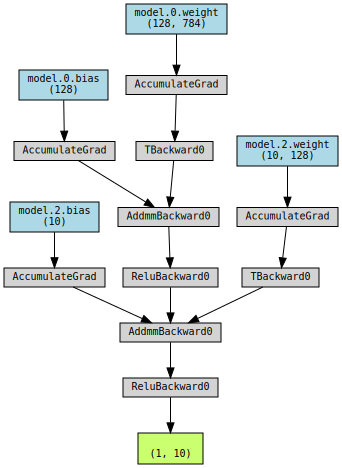

In [51]:
# prompt: different way of visualizing torch neural network

import torchviz

# ... (Your existing code) ...

# Assuming 'model' is your defined MyNN instance and you have some input data 'x_train'
# Get a sample input from the training data
sample_input = torch.tensor(x_train[0], dtype=torch.float32).unsqueeze(0)  # Add batch dimension


# Visualize the model using torchviz
torchviz.make_dot(model(sample_input), params=dict(model.named_parameters()))

In [50]:
!pip install torchviz

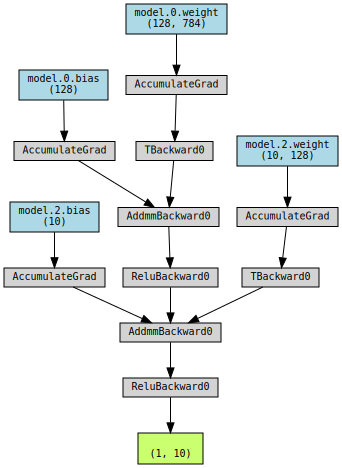

In [52]:
# prompt: another way of visualizing the torch model which is more beautiful

# ... (Your existing code) ...

# Assuming 'model' is your defined MyNN instance and you have some input data 'x_train'
# Get a sample input from the training data
sample_input = torch.tensor(x_train[0], dtype=torch.float32).unsqueeze(0)  # Add batch dimension


# Visualize the model using torchviz
from torchviz import make_dot
make_dot(model(sample_input), params=dict(model.named_parameters()))

In [58]:
# evaluation code
total  = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_dataloader:
    output = model(batch_features)
    _, predicted = torch.max(output, 1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()
print(correct/total)

0.7391666666666666


In [55]:

print(_)
print(f"predicted {predicted}")

tensor([17.2667, 21.0053,  0.0000, 15.4807, 28.4142, 11.1667,  0.0000, 12.3094,
        14.0213, 11.5588, 15.8190, 27.5611,  9.3951, 11.7557,  9.5224, 27.8086,
         0.0000,  8.6161, 34.6931, 18.9885, 22.1009, 14.1896, 23.5873, 15.6940,
        24.6258, 14.0625, 11.9705, 12.0893, 15.0648, 17.8534, 19.1042, 13.1716],
       grad_fn=<MaxBackward0>)
predicted tensor([6, 9, 0, 5, 1, 4, 0, 5, 3, 4, 7, 1, 4, 7, 6, 1, 0, 4, 1, 2, 6, 4, 6, 3,
        4, 3, 3, 5, 5, 6, 9, 7])
